In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [34]:
diamonds = pd.read_csv("diamonds.csv", index_col = 0)

In [35]:
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [36]:
print(diamonds.describe())
print(diamonds.cut.unique())
print(diamonds.color.unique())
print(diamonds.clarity.unique())

              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540000      4.040000  


In [37]:
# Define the Encode Function
def OrdererdListEncoder(ord_list):
    """
    ord_list: a python list with predetermined order
    return a dictionary that maps values in ord_list to a ranking
    """
    return {ord_list[i]: len(ord_list) - i for i in range(len(ord_list))}

In [38]:
# Encode Carat, Color and Cut
cut_rank = OrdererdListEncoder(['Ideal','Premium','Very Good', 'Good', 'Fair'])
color_rank = OrdererdListEncoder(list('DEFGHIJ'))
clarity_rank = OrdererdListEncoder(['IF','VVS1','VVS2','VS1','VS2','SI1','SI2','I1'])
cut_rank

{'Ideal': 5, 'Premium': 4, 'Very Good': 3, 'Good': 2, 'Fair': 1}

In [39]:
diamonds['cut'] = diamonds['cut'].apply(lambda x: cut_rank[x])
diamonds['color'] = diamonds['color'].apply(lambda x: color_rank[x])
diamonds['clarity'] = diamonds['clarity'].apply(lambda x: clarity_rank[x])

diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,5,6,2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,4,6,3,59.8,61.0,326,3.89,3.84,2.31
3,0.23,2,6,5,56.9,65.0,327,4.05,4.07,2.31
4,0.29,4,2,4,62.4,58.0,334,4.20,4.23,2.63
5,0.31,2,1,2,63.3,58.0,335,4.34,4.35,2.75


In [40]:
diamonds['carat_sqrd'] = np.square(diamonds['carat'])
diamonds['carat_exp'] = np.exp(diamonds['carat'])
diamonds = diamonds.drop(['x','y','z'], axis = 1)
diamonds.head()

,carat,cut,color,clarity,depth,table,price,carat_sqrd,carat_exp
1,0.23,5,6,2,61.5,55.0,326,0.0529,1.258600
2,0.21,4,6,3,59.8,61.0,326,0.0441,1.233678
3,0.23,2,6,5,56.9,65.0,327,0.0529,1.258600
4,0.29,4,2,4,62.4,58.0,334,0.0841,1.336427
5,0.31,2,1,2,63.3,58.0,335,0.0961,1.363425


F:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


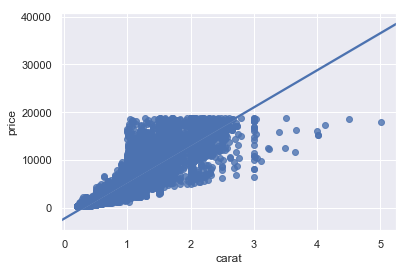

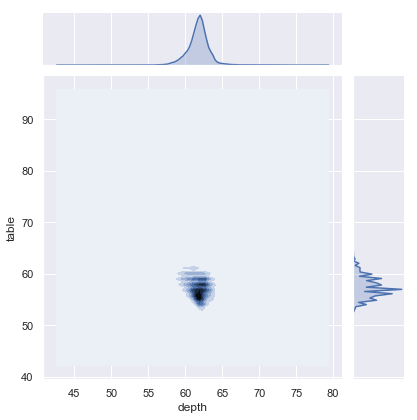

In [41]:
# Making some plots
sns.set(color_codes = True)
sns.regplot(x = 'carat', y = 'price', data=diamonds)
sns.jointplot(x = 'depth', y = 'table', data = diamonds, kind = 'kde')

In [ ]:
data_filtered=diamonds.loc[(diamonds['clarity']>=4) & (diamonds.cut >=4) & (diamonds.clarity >= 4), :]
data_filtered.head()

In [ ]:
sns.regplot(x = 'carat', y = 'price', data=data_filtered)

In [42]:
from sklearn.model_selection import train_test_split

# Y
y = diamonds.price

# X
X = diamonds.loc[:,diamonds.columns != 'price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 1)

X_train_reg = X_train.drop(['carat_sqrd', 'carat_exp'], axis = 1)
X_train_sqrd = X_train.drop(['carat', 'carat_exp'], axis = 1)
X_train_exp = X_train.drop(['carat_sqrd', 'carat'], axis = 1)

In [43]:
import statsmodels.api as sm
mod_reg = sm.OLS(y_train, X_train_reg)
mod_sqrd = sm.OLS(y_train, X_train_sqrd)
mod_exp = sm.OLS(y_train, X_train_exp)

res_reg = mod_reg.fit()
res_sqrd = mod_sqrd.fit()
res_exp = mod_exp.fit()

In [44]:
res_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                 1.170e+05
Date:                Mon, 03 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:40:50   Log-Likelihood:            -3.0889e+05
No. Observations:               36139   AIC:                         6.178e+05
Df Residuals:                   36133   BIC:                         6.178e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
carat       8787.3506     15.614    562.769      0.000    8756.746    8817.955
cut           97.0385      6.005     16.160      0.000      85.269     108.808
color        315.8828      4.065     77.715      0.000     307.916     323.850
clarity      519.5348      4.326    120.084      0.000     511.055     528.015
depth        -70.9500      2.231    -31.802      0.000     -75.323     -66.577
table        -44.6671      2.310    -19.340      0.000     -49.194     -40.140
==============================================================================
Omnibus:                     7195.043   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           197735.435
Skew:                           0.273   Prob(JB):                         0.00
Kurtosis:                      14.446   Cond. No.                         203.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
res_sqrd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 5.766e+04
Date:                Mon, 03 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:45:22   Log-Likelihood:            -3.2079e+05
No. Observations:               36139   AIC:                         6.416e+05
Df Residuals:                   36133   BIC:                         6.416e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cut           79.4556      8.346      9.520      0.000      63.097      95.814
color        253.6760      5.631     45.047      0.000     242.638     264.714
clarity      345.5728      5.905     58.527      0.000     334.000     357.146
depth        -45.2721      3.100    -14.603      0.000     -51.348     -39.196
table         13.8470      3.193      4.337      0.000       7.589      20.105
carat_sqrd  3597.9097      9.400    382.752      0.000    3579.485    3616.334
==============================================================================
Omnibus:                    38578.576   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         30446533.911
Skew:                          -4.552   Prob(JB):                         0.00
Kurtosis:                     144.904   Cond. No.                         91.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
res_exp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                 2.255e+04
Date:                Mon, 03 Dec 2018   Prob (F-statistic):               0.00
Time:                        18:45:47   Log-Likelihood:            -3.3527e+05
No. Observations:               36139   AIC:                         6.706e+05
Df Residuals:                   36133   BIC:                         6.706e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
cut           66.8915     12.460      5.368      0.000      42.469      91.314
color         57.0873      8.291      6.885      0.000      40.836      73.339
clarity      148.7882      8.705     17.092      0.000     131.726     165.850
depth        -70.3485      4.631    -15.192      0.000     -79.424     -61.273
table         53.2882      4.759     11.198      0.000      43.961      62.615
carat_exp   1610.7400      7.526    214.012      0.000    1595.988    1625.492
==============================================================================
Omnibus:                    80914.287   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       3841996881.072
Skew:                         -20.142   Prob(JB):                         0.00
Kurtosis:                    1599.827   Cond. No.                         79.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_reg, y_train)

X_test = X_test.drop(['carat_sqrd','carat_exp'], axis = 1)

y_pred = reg.predict(X_test)

# store errors
errors = y_pred - y_test

F:\Programs\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


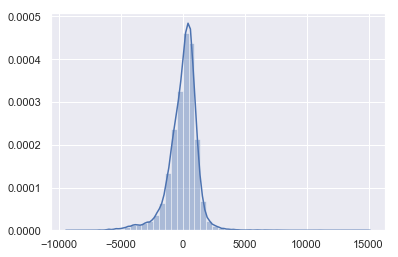

In [48]:
sns.distplot(errors.values)

With 0.05 as threshold, the model's accuracy is 0.11735295769900567
With 1000 as absolute threshold, the model's accuracy is 0.7186674905904162


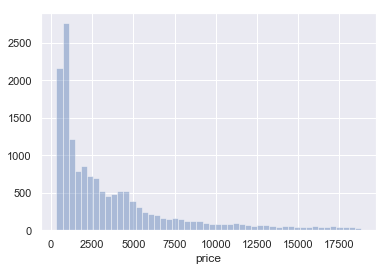

In [49]:
# Check where errors happen
error_threshold = 0.05
err_idx = errors[(np.abs(errors/ y_test) > error_threshold)].index

print("With {0} as threshold, the model's accuracy is {1}".format(error_threshold,1 - len(err_idx)/len(errors)))

# Absolute Error
err_abs_thr = 1000
err = np.sum(np.abs(errors) > err_abs_thr) / len(errors)
print("With {0} as absolute threshold, the model's accuracy is {1}".format(err_abs_thr, 1 - err))

error_samples = y_test[err_idx]
error_samples.describe()
sns.distplot(error_samples,kde=False)

In [50]:
from sklearn.linear_model import Ridge

rmod = Ridge(alpha=0.1)
res = rmod.fit(X_train_reg, y_train)
res

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [51]:
print(rmod.coef_, rmod.intercept_)

[8785.26062308  123.0524906   318.24614962  523.02670663  -39.00178802
  -25.3596286 ] -3207.119259955737


In [52]:
from sklearn.linear_model import Lasso

lmod = Lasso(alpha=0.1)
res = lmod.fit(X_train_reg, y_train)
res

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
print(lmod.coef_, lmod.intercept_)

[8784.7253158   123.01256591  318.17105748  522.95130438  -38.94764261
  -25.32730157] -3211.099341519168
